# Глобальная оптимизация 

In [8]:
import numpy as np
from scipy import optimize
import math
from matplotlib import pyplot as plt

Будем оптимизировать следующую функцию

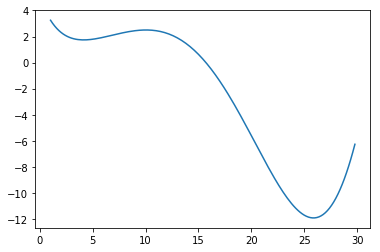

In [9]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

x = np.arange(1, 30, 0.2)
plt.plot(x, f(x))

Сперва оптимизируем используя метод Бройдена — Флетчера — Гольдфарба — Шанно c начальным приближением $x_0 = 2$

In [10]:
%%time
f_min = optimize.minimize(f, 2, method='BFGS')

Wall time: 2 ms


In [11]:
f_min

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

Затем используем алгоритм дифференциальной эволюции на отрезке $[1, 30]$

In [12]:
%%time
f_min_evo = optimize.differential_evolution(f, [(1, 30)])

Wall time: 7 ms


Получим другой минимум функции с меньшим значением функции по сравнению с результатом работы предыдущего алгоритма с начальным приближением $x_0 = 2$

In [13]:
f_min_evo

     fun: array([-11.89889467])
     jac: array([-3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019288])

Немного усложним нашу функцию, сделав ее ступенчатой

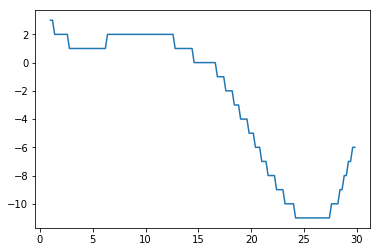

In [14]:
def h(x):
    return f(x).astype('int')

plt.plot(x, h(x))

Оптимизируем используя метод Бройдена — Флетчера — Гольдфарба — Шанно c начальным приближением $x_0 = 30$

In [15]:
%%time
f_min = optimize.minimize(h, 30, method='BFGS')

Wall time: 0 ns


In [16]:
f_min

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

Алгоритм дифференциальной эволюции: 

In [19]:
%%time
f_min_evo = optimize.differential_evolution(h, [(1, 30)])

Wall time: 6.99 ms


In [20]:
f_min_evo

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([27.53202523])

### В качестве вывода можно заключить, что алгоритм дифференциальной эволюции работает хоть и дольше, но справляется лучше алгоритма BFGS в задачах как гладкой, так и негладкой оптимизации